### DATA

In [1]:
#Process the raw PHEME data set

from src.utils import DatasetCreator

dataset_creator = DatasetCreator(test=True)


/home/hp/anaconda3/envs/GNN_project/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_example = dataset_creator.get_dataframe()

In [3]:
data_example.head()

,id_post,class,subject,text,Media_url
0,500388199064420352,0,ferguson-all-rnr-threads,Hard to believe this guy assaulted a cop. 😂😂😂 ...,http://pbs.twimg.com/media/BvG8ak6IQAAE2zx.jpg
1,500306187624407040,0,ferguson-all-rnr-threads,The day #Ferguson cops beat a man and charged ...,http://pbs.twimg.com/media/BvFrRW0CUAIN9JE.jpg
2,500413818368184321,0,ferguson-all-rnr-threads,"Remarkably, despite the military-style police ...",NaN
3,500292426154528770,0,ferguson-all-rnr-threads,If Mike Brown was engaged in a robbery before ...,NaN
4,500360889347096576,0,ferguson-all-rnr-threads,so ... they clearly released that video only ...,NaN


### PMIGraphConstructor

In [4]:
from src.utils import GraphConstructor

In [5]:
graph_constructor = GraphConstructor(window_size=5)

In [6]:
first_row = data_example.iloc[0]
graph = graph_constructor.construct_graph(row=first_row)

In [7]:
first_row.text

'Hard to believe this guy assaulted a cop. 😂😂😂 \n\n#Ferguson http://t.co/J86VLXnZF6'

In [8]:
graph.nodes['to']['embedding'].shape

(768,)

In [9]:
print(graph)

Graph with 10 nodes and 21 edges


In [10]:
graph.graph

{'class': 0, 'subject': 'ferguson-all-rnr-threads'}

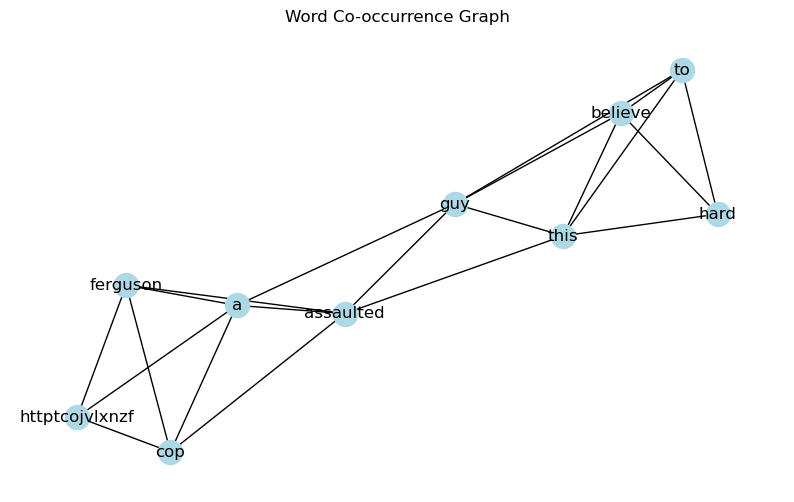

In [11]:
graph_constructor.visualize_graph(graph)

## PhemeDataset

In [13]:
from src.utils.PHEME_dataset import PHEMEDataset

pheme_dataset = PHEMEDataset(test=False)

In [14]:
pheme_dataset

PHEMEDataset(1959)

In [15]:
pheme_dataset.len()

1959

In [16]:
pheme_dataset[50]

Data(edge_index=[2, 54], class=0, subject='ferguson-all-rnr-threads', x=[22, 768], edge_attr=[54, 1], y=0)

In [17]:
from torch_geometric.loader import DataLoader

loader = DataLoader(pheme_dataset,batch_size=2,shuffle=True)

In [18]:
for x in loader:
    print(x)
    break

DataBatch(edge_index=[2, 12], class=[2], subject=[2], x=[42, 768], edge_attr=[12, 1], y=[2], batch=[42], ptr=[3])


## GCN Model

In [19]:
from src.models import KMGCN

In [20]:
x.edge_index[1].shape

torch.Size([12])

In [21]:
model = KMGCN(768,1000,2)

In [22]:
model(x).shape

torch.Size([2, 2])